In [86]:
from os import listdir
import pandas as pd
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [4]:
indir = "/scratch3/eirikgr/openData_13TeV/MC/SM_Backgrounds"
# The output file name tag to store the skim options used abvove
datatype = indir.split("/")[-1]
# In cases there is a trailing / at the end
if not datatype: datatype = indir.split("/")[-2]
print("INFO \t Data type is {:s}".format(datatype))
skimtag = "2L_pt25_25_met50"

# SM_Backgrounds_2L_pt25_25_met50_num_10.h5

rBackgroundEvents = 0.5
rSignalEvents = 0.5

INFO 	 Data type is SM_Backgrounds


In [5]:
root_files = [f for f in listdir(indir) if (f.endswith('.h5') and f.startswith(datatype+"_"+skimtag))]
print("Will load the following {:d} files:\n{:s}".format(len(root_files),"\n".join(sorted(root_files))))

Will load the following 10 files:
SM_Backgrounds_2L_pt25_25_met50_num_1.h5
SM_Backgrounds_2L_pt25_25_met50_num_10.h5
SM_Backgrounds_2L_pt25_25_met50_num_2.h5
SM_Backgrounds_2L_pt25_25_met50_num_3.h5
SM_Backgrounds_2L_pt25_25_met50_num_4.h5
SM_Backgrounds_2L_pt25_25_met50_num_5.h5
SM_Backgrounds_2L_pt25_25_met50_num_6.h5
SM_Backgrounds_2L_pt25_25_met50_num_7.h5
SM_Backgrounds_2L_pt25_25_met50_num_8.h5
SM_Backgrounds_2L_pt25_25_met50_num_9.h5


In [6]:
nfile = 0
nx = 0
# Read all the root files with a given skim
for f in root_files:
    print("INFO  \t Opening file {:d}/{:d}: {:s}".format(nfile+1,len(root_files),f))
    df = pd.read_hdf(indir+"/"+f, 'mini')
    # Find the unique DSIDs in the file
    dsid = np.unique(df.iloc[:,[1]].as_matrix())
    # Loop over each DSID and put random selections into training and testing sample 
    for ids in dsid:
        print("Doing DSID {:d}. In this file: {:d} new DSIDs".format(nx+1,len(dsid)))
        newdf = df.loc[df['channelNumber'] == ids]
        # If X_test/train exists: concatenate, 
        # If not (i.e. we just wrote to a file): start new ones
        try:
            midl = newdf.sample(frac=rBackgroundEvents)
            X_train = pd.concat([X_train,midl],axis=0)
            X_test  = pd.concat([X_test, newdf.drop(midl.index.values)],axis=0)
            del [midl]
        except:
            X_train = newdf.sample(frac=rBackgroundEvents)
            X_test  = newdf.drop(X_train.index.values)
        del [newdf]
        nx += 1
        # Dump testing/training samples to file every now and then (here: every tenth DSID)
        if nx%10 == 0:
            path = indir+"/testing_bkg_%s_%i.h5"%(skimtag,nfile)
            print("Writing to file {:s}".format(path))
            X_test.to_hdf(path,key='result', mode='w')
            path = indir+"/training_bkg_%s_%i.h5"%(skimtag,nfile)
            print("Writing to file {:s}".format(path))
            X_train.to_hdf(path,key='result', mode='w')
            del [X_test]
            del [X_train]
    nfile += 1
    #if nfile > 2: break
    del [df]
    
# Needed in case we left without writing the last DSIDs to file
if nx%10 != 0:
    path = indir+"/testing_bkg_%s_%i.h5"%(skimtag,nfile)
    print("Writing to file {:s}".format(path))
    X_test.to_hdf(path,key='result', mode='w')
    path = indir+"/training_bkg_%s_%i.h5"%(skimtag,nfile)
    print("Writing to file {:s}".format(path))
    X_train.to_hdf(path,key='result', mode='w')
    del [X_test]
    del [X_train]

INFO  	 Opening file 1/10: SM_Backgrounds_2L_pt25_25_met50_num_2.h5


/mn/felt/u1/eirikgr/anaconda2/envs/norootenv/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


Doing DSID 1. In this file: 7 new DSIDs
Doing DSID 2. In this file: 7 new DSIDs
Doing DSID 3. In this file: 7 new DSIDs
Doing DSID 4. In this file: 7 new DSIDs
Doing DSID 5. In this file: 7 new DSIDs
Doing DSID 6. In this file: 7 new DSIDs
Doing DSID 7. In this file: 7 new DSIDs
INFO  	 Opening file 2/10: SM_Backgrounds_2L_pt25_25_met50_num_5.h5
Doing DSID 8. In this file: 4 new DSIDs
Doing DSID 9. In this file: 4 new DSIDs
Doing DSID 10. In this file: 4 new DSIDs
Writing to file /scratch3/eirikgr/openData_13TeV/MC/SM_Backgrounds/testing_bkg_2L_pt25_25_met50_1.h5
Writing to file /scratch3/eirikgr/openData_13TeV/MC/SM_Backgrounds/training_bkg_2L_pt25_25_met50_1.h5
Doing DSID 11. In this file: 4 new DSIDs
INFO  	 Opening file 3/10: SM_Backgrounds_2L_pt25_25_met50_num_4.h5
Doing DSID 12. In this file: 19 new DSIDs
Doing DSID 13. In this file: 19 new DSIDs
Doing DSID 14. In this file: 19 new DSIDs
Doing DSID 15. In this file: 19 new DSIDs
Doing DSID 16. In this file: 19 new DSIDs
Doing DSI

In [8]:
training_files = [f for f in listdir(indir) if (f.endswith('.h5') and f.startswith("testing_bkg_"+skimtag))]
print("Will load the following {:d} files:\n{:s}".format(len(training_files),"\n".join(sorted(training_files))))

Will load the following 8 files:
testing_bkg_2L_pt25_25_met50_1.h5
testing_bkg_2L_pt25_25_met50_10.h5
testing_bkg_2L_pt25_25_met50_2.h5
testing_bkg_2L_pt25_25_met50_3.h5
testing_bkg_2L_pt25_25_met50_5.h5
testing_bkg_2L_pt25_25_met50_6.h5
testing_bkg_2L_pt25_25_met50_8.h5
testing_bkg_2L_pt25_25_met50_9.h5


In [9]:
nfile = 0
for f in training_files:
    print("INFO  \t Opening file {:d}/{:d}: {:s}".format(nfile+1,len(root_files),f))
    df = pd.read_hdf(indir+"/"+f, 'result')
    try:
        X_train = pd.concat([X_train,df],axis=0)
    except:
        X_train = df
    del [df]
    nfile += 1
    #break

INFO  	 Opening file 1/10: testing_bkg_2L_pt25_25_met50_1.h5
INFO  	 Opening file 2/10: testing_bkg_2L_pt25_25_met50_3.h5
INFO  	 Opening file 3/10: testing_bkg_2L_pt25_25_met50_10.h5
INFO  	 Opening file 4/10: testing_bkg_2L_pt25_25_met50_2.h5
INFO  	 Opening file 5/10: testing_bkg_2L_pt25_25_met50_8.h5
INFO  	 Opening file 6/10: testing_bkg_2L_pt25_25_met50_6.h5
INFO  	 Opening file 7/10: testing_bkg_2L_pt25_25_met50_5.h5
INFO  	 Opening file 8/10: testing_bkg_2L_pt25_25_met50_9.h5


In [55]:
X_train

,eventNumber,channelNumber,met_et,met_phi,met_et_syst,wgt,isSignal,MCType,jet_n60,mll,lep1_pt,lep1_eta,lep1_phi,lep1_E,lep2_pt,lep2_eta,lep2_phi,lep2_E
entry,,,,,,,,,,,,,,,,,,
54,630,364115,113417.515625,0.288614,17329.421875,0.000567,False,Zjets,0,91764.296875,47558.871094,2.088599,0.656938,194930.937500,44139.593750,2.290449,-2.312515,220269.593750
114,4099,364115,52138.582031,-3.050428,48.875000,0.000929,False,Zjets,0,90888.101562,58792.906250,-0.606435,0.142648,69939.257812,36394.652344,-0.470796,-2.598974,40503.128906
137,4476,364115,53455.035156,2.239623,24703.505859,0.000885,False,Zjets,0,91290.398438,50086.726562,1.320449,-1.039327,100476.945312,38485.582031,0.083607,-2.908753,38620.171875
171,3095,364115,58673.191406,-1.777509,35981.234375,0.000885,False,Zjets,1,93860.109375,45051.078125,-0.971411,1.579500,68032.015625,35224.757812,0.206706,-1.630129,35979.972656
347,9305,364115,58222.140625,1.690012,13879.535156,0.000470,False,Zjets,0,95371.765625,49372.875000,0.280798,-0.329805,51332.164062,45272.828125,0.545433,2.777160,52175.714844
361,9094,364115,56842.578125,-1.210777,7279.171875,0.000441,False,Zjets,0,91806.453125,38355.234375,-0.740450,-2.232293,49358.941406,29575.482422,0.929293,1.172897,43291.871094
493,214704,364115,61497.453125,1.659589,6273.515625,0.000951,False,Zjets,0,86032.117188,52281.273438,-0.428816,-0.544656,57162.214844,30056.878906,0.416304,2.815668,32699.283203
853,668261,364115,55087.562500,-0.399033,349.347656,0.000922,False,Zjets,0,93522.015625,44198.632812,0.809896,2.600569,59504.132812,29237.853516,-0.715492,-0.325525,37046.472656
962,670740,364115,59411.992188,1.876467,1988.082031,-0.000976,False,Zjets,1,94664.468750,51068.855469,1.958653,2.661519,184634.859375,35003.914062,0.971947,-0.685729,52880.972656


In [46]:
stack_order = ['Wjets','Top','Diboson','Zjets']
samples = {'Wjets':{'color':"#e55934"},
           'Zjets':{'color':"#086788"},
           'Top':{'color':"#9bc53d"},
           'Diboson':{'color':"#fa7921"}}
bkgs = X_train['MCType'].unique()
print(bkgs)

['Zjets' 'Wjets' 'Top' 'Diboson']


In [95]:
mc_mll = []
mc_weights = []
mc_colors = []
mc_labels = []
var = "mll"
top = -999
for s in stack_order:
    rslt_df = X_train.loc[X_train['MCType'] == s]
    mc_mll.append(rslt_df.as_matrix(columns=rslt_df.columns[rslt_df.columns.get_loc(var):rslt_df.columns.get_loc(var)+1])/1000.)
    mc_weights.append(rslt_df.as_matrix(columns=rslt_df.columns[rslt_df.columns.get_loc("wgt"):rslt_df.columns.get_loc("wgt")+1])*1000.)
    mc_colors.append(samples[s]['color'])
    mc_labels.append(s)
    if np.amax(mc_mll[-1]) > top:
        top = np.amax(mc_mll[-1])
    del [rslt_df]
    print(s)
        

/mn/felt/u1/eirikgr/anaconda2/envs/norootenv/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':
/mn/felt/u1/eirikgr/anaconda2/envs/norootenv/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.


Wjets
Top
Diboson
Zjets


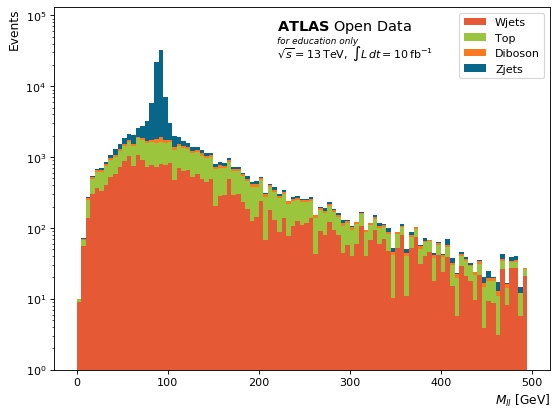

In [104]:
nmax = 500
nmin = 0
binw = 5
bins = [x*binw for x in range(int((nmax-nmin)/binw))]
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.hist(mc_mll,bins=bins,weights=mc_weights,stacked=True,color=mc_colors, label=mc_labels); #weights=mc_weights,
plt.yscale('log')
plt.ylabel(r'Events',fontname='sans-serif',horizontalalignment='right',y=1.0,fontsize=11)
plt.xlabel(r'$M_{ll}$ [GeV]',fontname='sans-serif',horizontalalignment='right',x=1.0,fontsize=11)

plt.ylim(bottom=1,top=top*10)

ax = plt.gca()
plt.text(0.45,0.97,r'$\mathbf{{ATLAS}}$ Open Data',ha="left",va="top",family='sans-serif',transform=ax.transAxes,fontsize=13)
plt.text(0.45,0.92,'for education only',ha="left",va="top",family='sans-serif',transform=ax.transAxes,style='italic',fontsize=8)
plt.text(0.45,0.90,r'$\sqrt{s}=13\,\mathrm{TeV},\;\int L\,dt=10\,\mathrm{fb}^{-1}$',ha="left",va="top",family='sans-serif',transform=ax.transAxes)


plt.legend()
